# Classification models based on data about pets

## Libraries and settings

In [21]:
# Libraries
import os
import random
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Show current working directory
print(os.getcwd())

/workspaces/data_analytics/GK/Week_09


## Simulate pet data

In [22]:
# Set a seed for reproducibility
random.seed(42)

# Function to generate pets
def pets(pet_type, weight_min, weight_max, height_min, height_max, n_animals=1000):

    pets = pd.DataFrame({
            'pets': [pet_type for _ in range(n_animals)],
            'age': [random.randint(1, 15) for _ in range(n_animals)],
            'color': [random.choice(['red', 'blue', 'green', 'yellow']) for _ in range(n_animals)],
            'weight': [random.uniform(weight_min, weight_max) for _ in range(n_animals)],
            'height': [random.uniform(height_min, height_max) for _ in range(n_animals)],
            'eats_meat': [random.choice(['yes', 'no']) for _ in range(n_animals)]})

    return pets

# Simulate animals
dogs = pets('dog', weight_min=5, weight_max=80, height_min=20, height_max=90)
cats = pets('cat', weight_min=2, weight_max=8, height_min=20, height_max=40)
birds = pets('bird', weight_min=0.2, weight_max=7, height_min=10, height_max=80)
fishes = pets('fish', weight_min=0.1, weight_max=30, height_min=10, height_max=30)

df_orig = pd.concat([dogs, cats, birds, fishes])
df_orig

,pets,age,color,weight,height,eats_meat
0,dog,11,red,57.802836,54.630046,yes
1,dog,2,blue,21.092782,42.600560,no
2,dog,1,yellow,50.890789,39.851515,no
3,dog,12,green,57.048548,58.311737,no
4,dog,5,green,79.897163,29.141598,no
...,...,...,...,...,...,...
995,fish,2,red,20.141257,28.470592,no
996,fish,2,blue,25.453178,19.130771,yes
997,fish,3,green,19.971044,25.084742,no
998,fish,14,green,1.595759,29.920450,no


## Convert categorical features to numerical using one-hot encoding

In [23]:
X = pd.get_dummies(df_orig.drop('pets', axis=1))
X

,age,weight,height,color_blue,color_green,color_red,color_yellow,eats_meat_no,eats_meat_yes
0,11,57.802836,54.630046,False,False,True,False,False,True
1,2,21.092782,42.600560,True,False,False,False,True,False
2,1,50.890789,39.851515,False,False,False,True,True,False
3,12,57.048548,58.311737,False,True,False,False,True,False
4,5,79.897163,29.141598,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...
995,2,20.141257,28.470592,False,False,True,False,True,False
996,2,25.453178,19.130771,True,False,False,False,False,True
997,3,19.971044,25.084742,False,True,False,False,True,False
998,14,1.595759,29.920450,False,True,False,False,True,False


### Create train and test samples (train = 80%, test = 20% of the data)

In [24]:
# Create train and test samples
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    df_orig['pets'], 
                                                    test_size=0.20, 
                                                    random_state=42)

# Show X_train
print('X_train:')
print(X_train.head(), '\n')

# Show y_train
print('y_train:')
print(y_train.head())

X_train:
     age     weight     height  color_blue  color_green  color_red  \
994   11  28.303778  29.153755        True        False      False   
423    1  11.018749  69.502804       False         True      False   
991    3   0.418171  78.328731       False        False       True   
221    4   3.811082  29.331735       False         True      False   
506    1  38.734012  47.503155       False        False       True   

     color_yellow  eats_meat_no  eats_meat_yes  
994         False         False           True  
423         False         False           True  
991         False         False           True  
221         False         False           True  
506         False          True          False   

y_train:
994    fish
423     dog
991    bird
221     cat
506     dog
Name: pets, dtype: object


## Fit a classification tree

In [25]:
# Create decision tree regressor object
clf = DecisionTreeClassifier(random_state=20, 
                             max_depth=3)

# Train decision tree regressor
clf = clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

## Use cross-validation to evaluate the model performance

In [26]:
# Cross-validation (5-fold)
cv = cross_val_score(clf, 
                     X_test, 
                     y_test, 
                     cv=5, 
                     scoring='accuracy')

# Result
print(list(cv.round(4)), end="")

[0.8438, 0.8375, 0.8562, 0.7938, 0.8625]

## Plot the classification tree

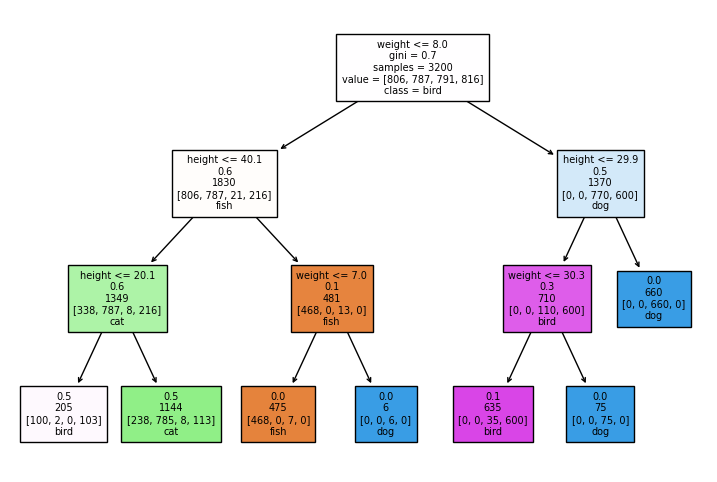

In [27]:
# Get unique class names
unique_class_names = df_orig['pets'].unique()

# For the meaning of numbers in each box, look at the root node
fig = plt.figure(figsize=(9,6))

# Plot the 
tree_plot = tree.plot_tree(clf,
                           feature_names=list(X_train.columns),
                           class_names=['fish', 'cat', 'dog', 'bird'],
                           filled=True,
                           fontsize=7,
                           label='root',
                           precision=1)

## Fit the Random Forest Classifier

In [28]:
clf_rf = RandomForestClassifier(n_estimators=500, 
                               max_depth=10, 
                               random_state=42)
clf_rf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf_rf.predict(X_test)

# Calculate accuracy
print(f'Accuracy: {metrics.accuracy_score(y_test, y_pred):.4f}')

Accuracy: 0.8525


## Show feature importance

Index(['weight', 'height', 'age', 'color_red', 'color_blue', 'eats_meat_no',
       'color_green', 'eats_meat_yes', 'color_yellow'],
      dtype='object')
[0.52785436 0.41947015 0.03243662 0.00361166 0.00351354 0.00337957
 0.00329605 0.00323345 0.0032046 ]


<Axes: ylabel='features'>

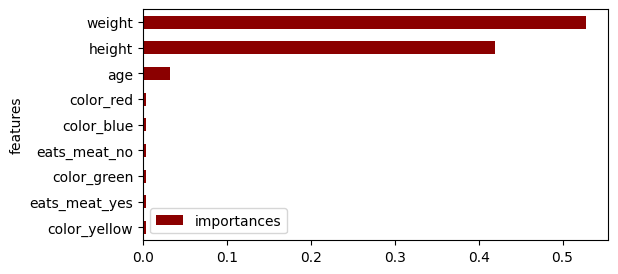

In [29]:
cols = X_train.columns

# Derive feature importance from random forest
importances = clf_rf.feature_importances_
std         = np.std([tree.feature_importances_ for tree in clf_rf.estimators_], axis=0)
indices     = np.argsort(importances)[::-1]

# Print col-names and importances-values
print( cols[indices] )
print( importances[indices] )

# Barplot with feature importance
df_fi = pd.DataFrame({'features':cols,'importances': importances})
df_fi.sort_values('importances', inplace=True)
df_fi.plot(kind='barh', 
           y='importances', 
           x='features', 
           color='darkred', 
           figsize=(6,3))

### Jupyter notebook --footer info-- (please always provide this at the end of each notebook)

In [30]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 6.2.0-1015-azure
Datetime: 2023-11-13 09:34:34
Python Version: 3.10.13
-----------------------------------
